In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data loading

Данные взяты из https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

In [3]:
df = pd.read_csv("../data/external/heart_cleveland_upload.csv")
df.rename(columns={'condition': 'target'}, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [14]:
# Missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This dataset looks perfect to use as we don’t have null as well as missing values.

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Number of people with heart disease vs No. of people without heart disease

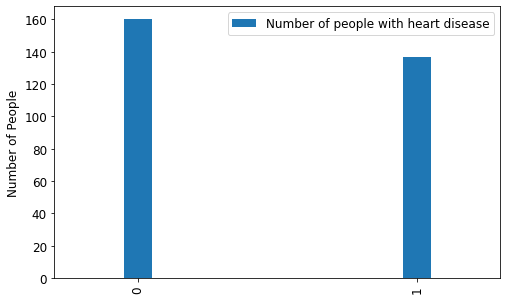

In [16]:
df.target.value_counts().plot(kind="bar", width=0.1, legend=1, figsize=(8, 5))
plt.ylabel("Number of People", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Number of people with heart disease"], fontsize=12)
plt.show()

We have 165 people with heart disease and 138 people without heart disease, so our problem is balanced.

# Correaltions

#### CORRELAION MATRIX HEATMAP

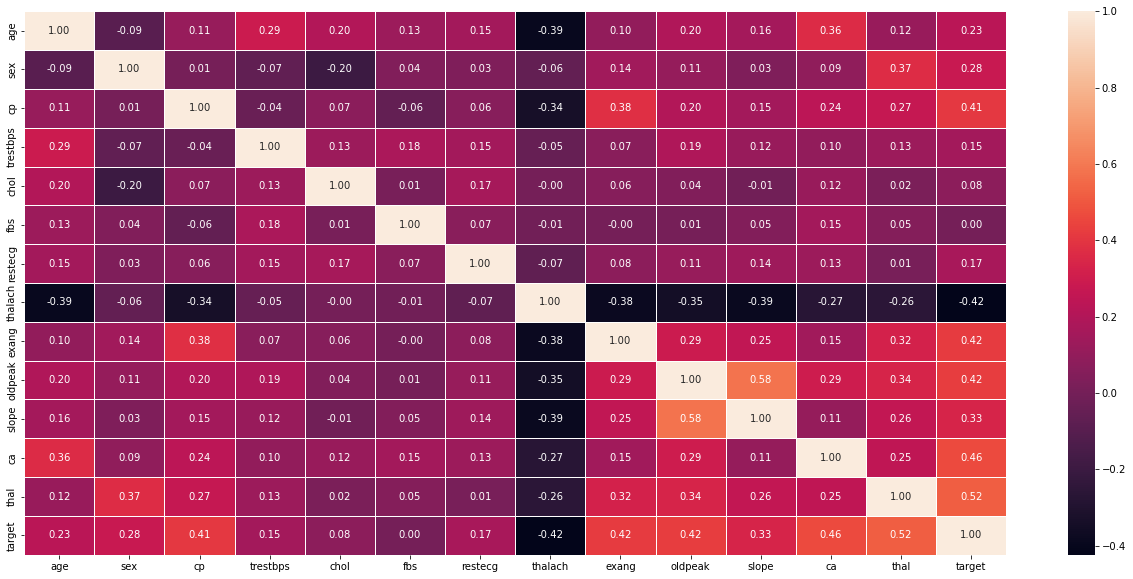

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f")

#### CORRELATION WITH TARGET

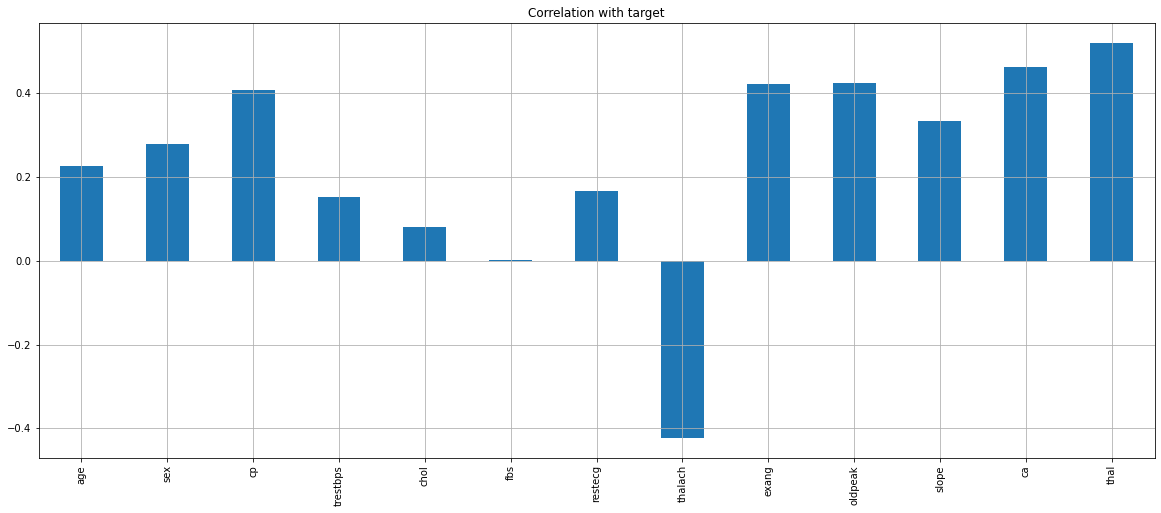

In [20]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 8),
                                                   title="Correlation with target");


Observations from correlation:

* fbs and chol are the least correlated with the target variable.
* All other variables have a significant correlation with the target variable.

# Feature distributions

#### Categorical and Continous Values:

In [21]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('-------------------------------')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

-------------------------------
age : [69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
-------------------------------
sex : [1 0]
-------------------------------
cp : [0 1 2 3]
-------------------------------
trestbps : [160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
-------------------------------
chol : [234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 

#### Continous Values Histogram

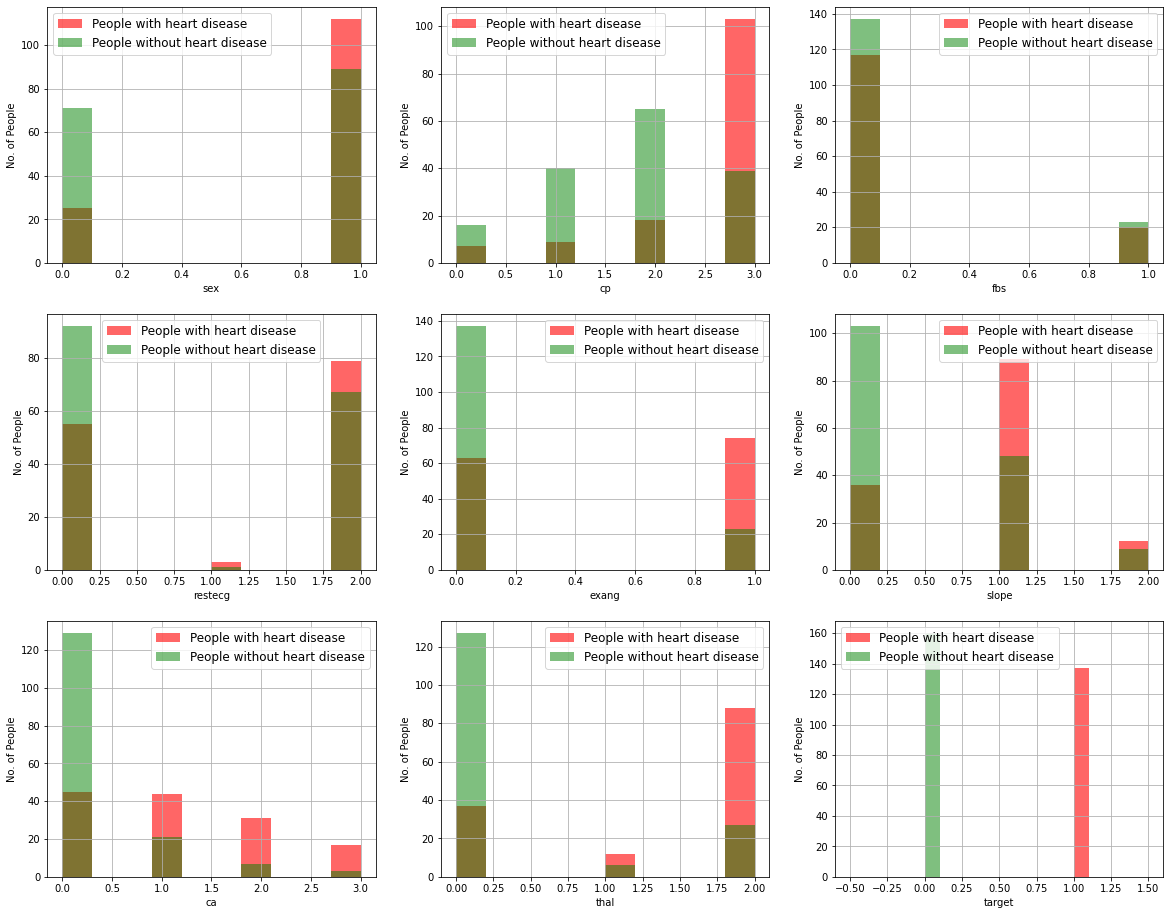

In [24]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 1][column].hist(bins=10, color='red', label='People with heart disease', alpha=0.6)
    df[df["target"] == 0][column].hist(bins=10, color='green', label='People without heart disease', alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")

#### Continous Values Histogram

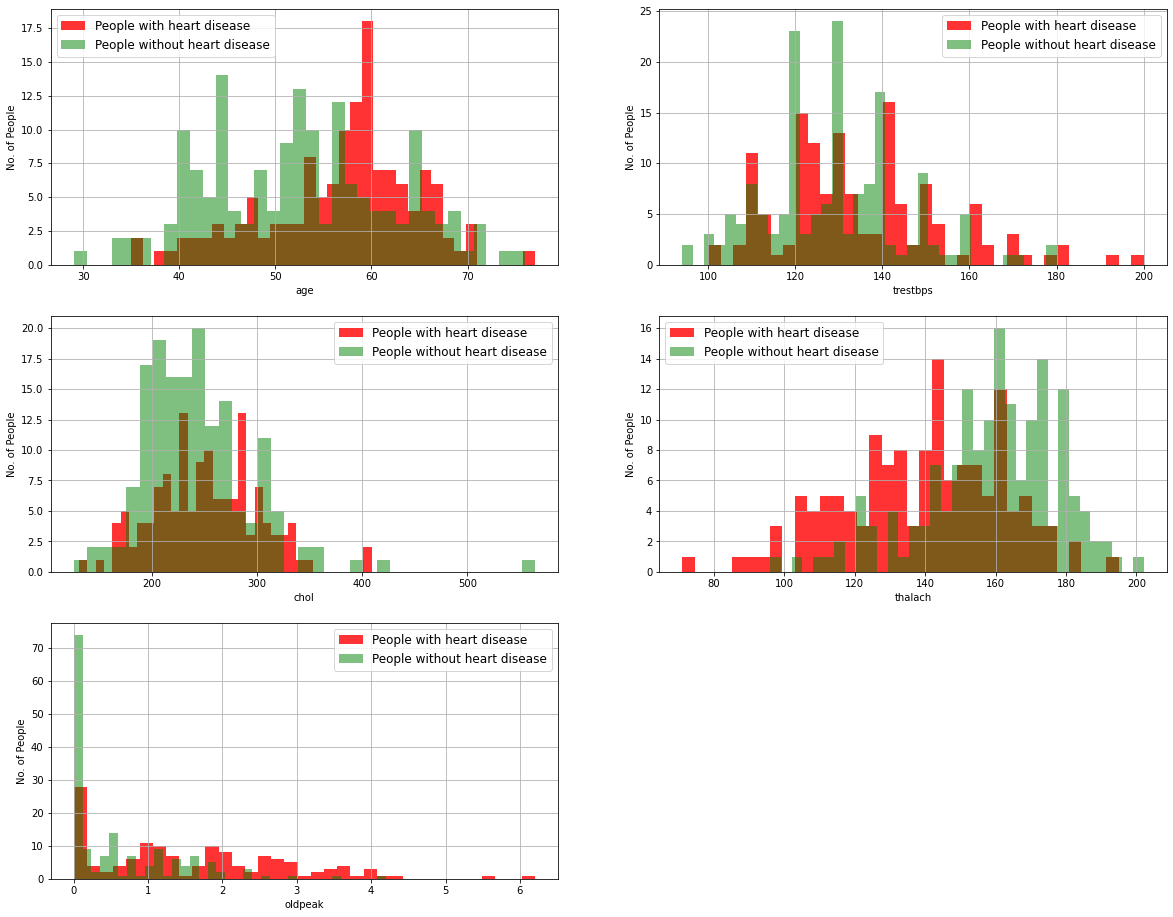

In [28]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='People with heart disease', alpha=0.8)
    df[df["target"] == 0][column].hist(bins=35, color='green', label='People without heart disease', alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")


Observations from the above plot:

* trestbps: resting blood pressure anything above 120-140 is generally of concern.
* chol: greater than 200 is of concern.
* thalach: People with a maximum heart rate of over 140 are more likely to have heart disease.
* the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

# Pair Distributions

#### SCATTER PLOT (Age Vs Max Heart Rate)

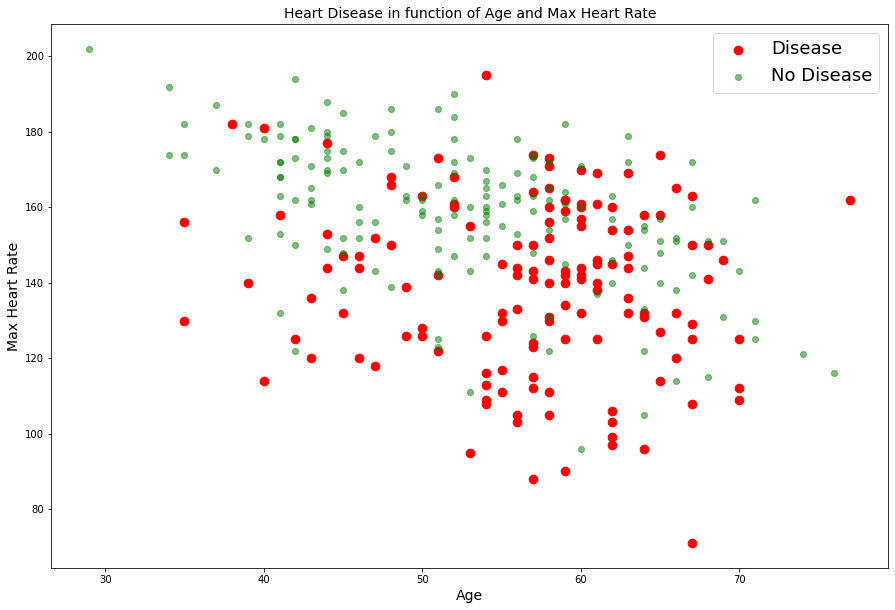

In [29]:
plt.figure(figsize=(15, 10))
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="red", s=75)
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="green", alpha=0.5)
plt.title("Heart Disease in function of Age and Max Heart Rate", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Max Heart Rate", fontsize=14)
plt.legend(["Disease", "No Disease"], fontsize=18);

Observation from above plot:

This data isn't correlated at all so it is of no use to us

#### SCATTER PLOT (Age Vs Serum Cholestoral(mg/dl))

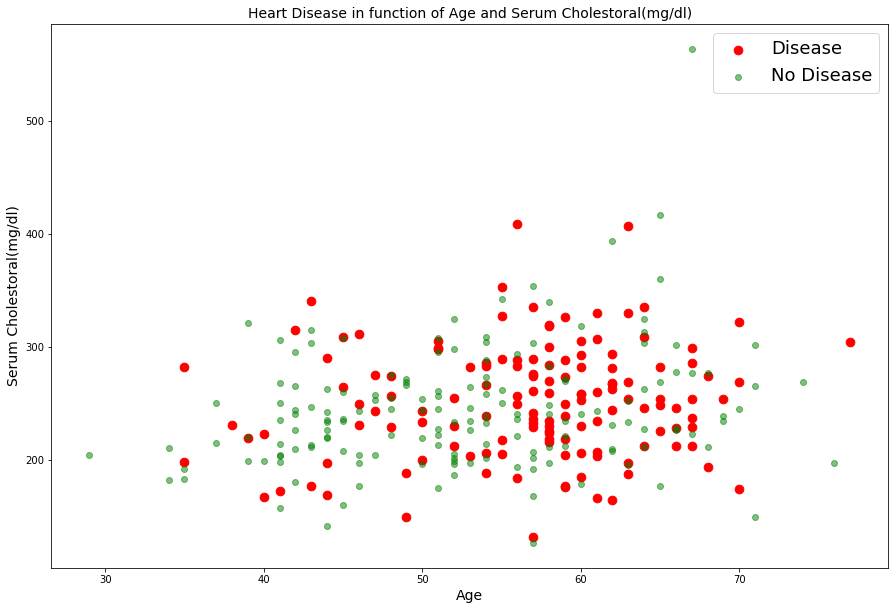

In [30]:
plt.figure(figsize=(15, 10))
plt.scatter(df.age[df.target == 1], df.chol[df.target == 1], c="red", s=75)
plt.scatter(df.age[df.target == 0], df.chol[df.target == 0], c="green", alpha=0.5)
plt.title("Heart Disease in function of Age and Serum Cholestoral(mg/dl)", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Serum Cholestoral(mg/dl)", fontsize=14)
plt.legend(["Disease", "No Disease"], fontsize=18);

#### SCATTER PLOT (Age Vs Resting Blood Pressure)

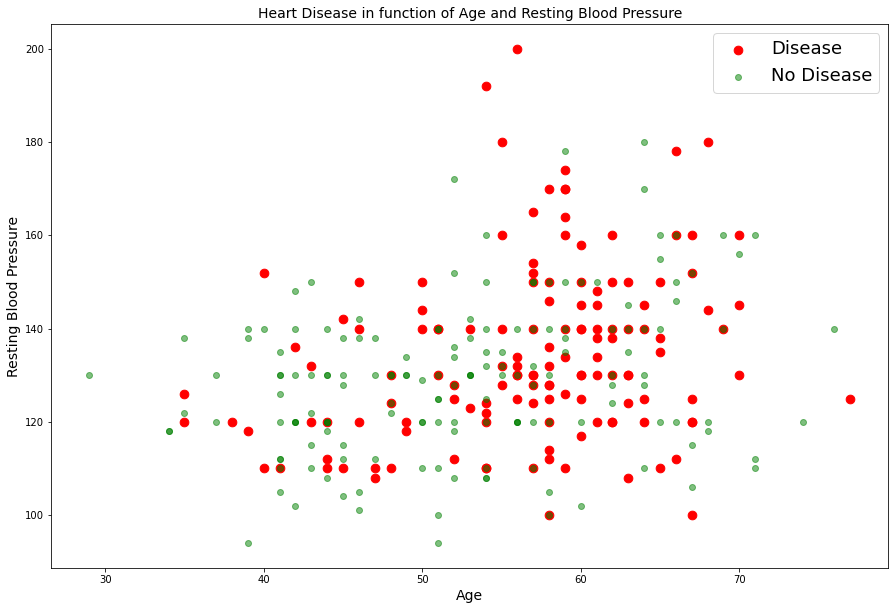

In [31]:
plt.figure(figsize=(15, 10))
plt.scatter(df.age[df.target==1],df.trestbps[df.target==1],c="red",s=75)
plt.scatter(df.age[df.target==0],df.trestbps[df.target==0],c="green",alpha=0.5)
plt.title("Heart Disease in function of Age and Resting Blood Pressure",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Resting Blood Pressure", fontsize=14)
plt.legend(["Disease", "No Disease"],fontsize=18);

OBSERVATION from above plots(8 & 9):

Both Resting Blood Pressure and Serum Cholesterol shows a bit positive correlation but not that much. Also, Resting Blood Pressure and Serum Cholesterol have few Outliers which we will remove in preprocessing steps.